In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import os, sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from wordcloud import WordCloud

In [4]:
os.chdir('..')

In [5]:
from src.loader import NewsDataLoader
import src.countries_region as countries_region 

In [6]:
from src.config import cfg

Output File: news_output.csv
Path: data
News Data: rating.csv
Traffic Data: trafiic.csv
Domain Location Data: domains_location.csv


In [7]:
import src.utils as utils

In [8]:
news_data_loader = NewsDataLoader(cfg.path)

In [9]:
# get news csv file
news = news_data_loader.get_news()

# get traffic csv file
traffic = news_data_loader.get_traffic()

# get domain location data csv file
domain = news_data_loader.get_domain_location()

In [60]:
df = pd.read_csv(news)
traffic_df = pd.read_csv(traffic)
domain_df = pd.read_csv(domain)

In [61]:
df.isna().sum()

article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
dtype: int64

In [62]:
domain_df.isna().sum()

SourceCommonName    0
location            0
Country             1
dtype: int64

In [63]:

traffic_df.isna().sum()

GlobalRank        0
TldRank           0
Domain            0
TLD               0
RefSubNets        0
RefIPs            0
IDN_Domain        0
IDN_TLD           0
PrevGlobalRank    0
PrevTldRank       0
PrevRefSubNets    0
PrevRefIPs        0
dtype: int64

In [64]:
df = df.drop_duplicates()
df = df.dropna()

traffic_df = traffic_df.drop_duplicates()
traffic_df = traffic_df.dropna()

domain_df = domain_df.drop_duplicates()
domain_df = domain_df.dropna()

In [65]:
df.isna().sum()

article_id         0
source_id          0
source_name        0
author             0
title              0
description        0
url                0
url_to_image       0
published_at       0
content            0
category           0
article            0
title_sentiment    0
dtype: int64

In [66]:
traffic_df.isna().sum()

GlobalRank        0
TldRank           0
Domain            0
TLD               0
RefSubNets        0
RefIPs            0
IDN_Domain        0
IDN_TLD           0
PrevGlobalRank    0
PrevTldRank       0
PrevRefSubNets    0
PrevRefIPs        0
dtype: int64

In [67]:
domain_df.isna().sum()

SourceCommonName    0
location            0
Country             0
dtype: int64

In [68]:
df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
5,81707,al-jazeera-english,Al Jazeera English,Al Jazeera,unga calls for humanitarian truce in israel-ha...,The resolution passed with 120 votes in favour...,https://www.aljazeera.com/news/2023/10/27/unga...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-27 22:16:05.000000,The United Nations General Assembly has passed...,Madagascar,the resolution passed with 120 votes in favour...,Neutral
6,81717,bbc-news,BBC News,https://www.facebook.com/bbcnews,malawi heatwave warning issued as temperatures...,"Temperatures could soar to 44C, the weather bu...",https://www.bbc.co.uk/news/world-africa-67086254,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-10-12 10:40:48.000000,Malawians have been warned of an extreme heatw...,Madagascar,malawians have been warned of an extreme heatw...,Neutral
11,81739,rt,RT,RT,russian marine scientists to conduct african r...,Russian scientists from VNIRO will conduct res...,https://www.rt.com/africa/585847-russian-scien...,https://mf.b37mrtl.ru/files/2023.10/article/65...,2023-10-26 11:04:42.000000,Scientists from the All-Russian Research Insti...,Madagascar,scientists from the all-russian research insti...,Neutral
16,81755,al-jazeera-english,Al Jazeera English,Al Jazeera,‘kids whose insides are destroyed’: the return...,Mauritius grapples with a drug epidemic of unp...,https://www.aljazeera.com/features/2023/10/4/k...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-04 14:43:28.000000,"Port Louis, Mauritius Until early 2022, Gaetan...",Madagascar,the island nation is grappling with a drug epi...,Negative


In [12]:
domain_df.head()

,SourceCommonName,location,Country
0,00221.info,SG,Senegal
1,01net.com,FR,France
2,01net.it,IT,Italy
3,0223.com.ar,AR,Argentina
4,022china.com,CH,China


In [69]:
traffic_df.head()

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,google.com,com,471274,2151358,google.com,com,1,1,471248,2147402
1,2,2,facebook.com,com,465424,2250631,facebook.com,com,2,2,465297,2247135
2,3,3,youtube.com,com,420579,1852995,youtube.com,com,3,3,420483,1848940
3,4,4,twitter.com,com,404985,1757127,twitter.com,com,4,4,404998,1753939
4,5,5,instagram.com,com,364746,1598085,instagram.com,com,5,5,364618,1594892


In [70]:
df["title_sentiment"].value_counts()

Neutral     10187
Negative     4912
Positive     1701
Name: title_sentiment, dtype: int64

In [71]:
df.info()
# traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16800 entries, 2 to 58349
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       16800 non-null  int64 
 1   source_id        16800 non-null  object
 2   source_name      16800 non-null  object
 3   author           16800 non-null  object
 4   title            16800 non-null  object
 5   description      16800 non-null  object
 6   url              16800 non-null  object
 7   url_to_image     16800 non-null  object
 8   published_at     16800 non-null  object
 9   content          16800 non-null  object
 10  category         16800 non-null  object
 11  article          16800 non-null  object
 12  title_sentiment  16800 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.8+ MB


we can see that source_id, author, description, url_to_image and category have null values

In [72]:
# Count the number of articles per source_name
article_counts = df['source_name'].value_counts()

# Get the top 10 websites
top_10_websites = article_counts.head(10)

# Get the bottom 10 websites
bottom_10_websites = article_counts.tail(10)

In [73]:
print("Top 10 websites with the largest count of news articles:")
print(top_10_websites)
print("\nBottom 10 websites with the smallest count of news articles:")
print(bottom_10_websites)

Top 10 websites with the largest count of news articles:
The Times of India    6987
Business Insider      1968
ABC News              1946
BBC News              1939
Al Jazeera English    1587
RT                    1086
Time                   578
Wired                  252
CNN                    252
The Verge              205
Name: source_name, dtype: int64

Bottom 10 websites with the smallest count of news articles:
The Times of India    6987
Business Insider      1968
ABC News              1946
BBC News              1939
Al Jazeera English    1587
RT                    1086
Time                   578
Wired                  252
CNN                    252
The Verge              205
Name: source_name, dtype: int64


In [21]:
# url_list = df['url']
# utils.break_combined_urls(url_list)

In [74]:
sorted_df = traffic_df.sort_values('GlobalRank')

# Display the top 10 websites
top_10_websites = sorted_df['Domain'].head(10)

bottom_10_websites = sorted_df['Domain'].tail(10)

print("Top 10 websites with the highest numbers of visitor traffic:\n")
print(top_10_websites)

print("\n\nBottom 10 websites visitor traffic: \n")
print(bottom_10_websites)

Top 10 websites with the highest numbers of visitor traffic:

0              google.com
1            facebook.com
2             youtube.com
3             twitter.com
4           instagram.com
5            linkedin.com
6               apple.com
7           microsoft.com
8    googletagmanager.com
9           wikipedia.org
Name: Domain, dtype: object


Bottom 10 websites visitor traffic: 

999990              eiretrip.com
999991      exploring-africa.com
999992                  hmag.com
999993            irishcycle.com
999994           keith-baker.com
999995                kireie.com
999996               mt-lock.com
999997             pinkwater.com
999998            soderhomes.com
999999    toyotamusicfactory.com
Name: Domain, dtype: object


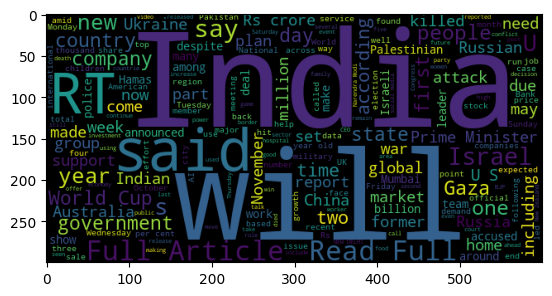

In [75]:
wc = WordCloud(width=600,height=300).generate(' '.join(df['description']))
plt.imshow(wc);

In [76]:
category = df['category'].value_counts()
countries = domain_df['Country'].unique()
# Countries that have many articles written about them
country_categories = category[category.index.isin(countries)]
print("Top 10\n")
print(country_categories.head(10))
print("\nBottom 10\n")
print(country_categories.tail(10))

Top 10

India          867
Ukraine        344
Australia      293
Israel         224
Egypt          166
Mexico         138
China          136
Pakistan       136
New Zealand    131
Afghanistan    116
Name: category, dtype: int64

Bottom 10

Montserrat       2
Burkina Faso     2
Guernsey         2
Seychelles       2
Costa Rica       2
Martinique       1
Eritrea          1
Liechtenstein    1
Belize           1
Tajikistan       1
Name: category, dtype: int64


In [87]:
cntry = countries_region.get_region()
domain_df['Region'] = domain_df['Country'].map(cntry)

In [86]:
#show which rows in region are null
domain_df[domain_df['Region'].isnull()]['Country'].unique()

array(['Taiwan', 'Slovak Republic', 'Aruba', 'Bosnia-Herzegovina',
       'Keeling Islands', 'Ireland', 'British Indian Ocean Territory',
       'Ivory Coast', 'Gambia', 'Congo', 'Niue', 'Hong Kong',
       'South Georgia and the South Sandwich Islands', 'Anguilla',
       'Greenland', 'Bermuda', 'French Polynesia',
       'British Virgin Islands', 'Martinique', 'South Sudan', 'Brunei',
       'Kosovo', 'Virgin Islands', 'American Samoa', 'Cayman Islands',
       'Gibraltar', 'Reunion', 'New Caledonia', 'Cook Islands',
       'Guadeloupe', 'Jersey', 'Micronesia', 'Macau', 'Montserrat',
       'Faroe Islands', 'Guam', 'Tokelau', 'Isle of Man', 'Guernsey',
       'Sao Tome and Principe', 'Mayotte', 'Puerto Rico', 'West Bank',
       'Pitcairn Islands', 'Oceans', 'Turks and Caicos Islands',
       'Saint Helena'], dtype=object)

In [89]:
#drop rows with null values in region
domain_df = domain_df.dropna(subset=['Region'])
domain_df.head()

,SourceCommonName,location,Country,Region
0,00221.info,SG,Senegal,Africa
1,01net.com,FR,France,Europe
2,01net.it,IT,Italy,Europe
3,0223.com.ar,AR,Argentina,South America
4,022china.com,CH,China,China
